In [1]:
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astroquery.vizier import Vizier

from astroquery.mast import Observations

import lightkurve

from matplotlib import pyplot
import numpy
import pandas
import seaborn

from pathlib import Path

from targets import TARGETS

In [2]:
photometry = Table.read(Path('data/target_observations/HD38451.ecsv'))
photometry = photometry[(photometry['FLAGS'] == 0) & (photometry['telescope'] == 'PIRATE')]
photometry = photometry[photometry['calibrated magnitude'] != None]
photometry = photometry[photometry['calibrated magnitude err'] != None]
photometry = photometry[photometry['calibrated magnitude err'] < 1]
photometry['calibrated magnitude'].fill_value = numpy.nan
photometry = photometry.to_pandas()
photometry

,NUMBER,X_IMAGE,Y_IMAGE,A_IMAGE,B_IMAGE,KRON_RADIUS,RA,Dec,FLUX_MAX,FLUX_AUTO,...,matched target,matched target separation,telescope,main target,band,exposure,timestamp,observation catalogue,calibrated magnitude,calibrated magnitude err
0,5082,1983.7744,1928.6124,3.077,2.707,3.5,86.687815,21.200423,32338.460,918152.0,...,HD38451,0.000088,PIRATE,HD38451,V,10.0,2.459560e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.718002,0.05205
1,1024,1986.2778,1931.4484,3.409,2.885,3.5,86.687818,21.200411,41468.920,1387611.0,...,HD38451,0.000076,PIRATE,HD38451,R,15.0,2.459560e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.668029,0.064179
2,1441,1937.4689,2027.2257,9.914,3.418,3.5,86.687819,21.200451,7990.929,927069.1,...,HD38451,0.000115,PIRATE,HD38451,V,10.0,2.459559e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.707126,0.051872
3,645,1929.7778,2023.2579,8.445,3.675,3.5,86.687797,21.200399,12275.390,1376843.0,...,HD38451,0.000074,PIRATE,HD38451,R,15.0,2.459559e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.639506,0.063118
4,8536,1986.0345,1932.9904,3.271,2.933,3.5,86.687819,21.200339,32775.040,1035000.0,...,HD38451,0.000024,PIRATE,HD38451,B,15.0,2.459560e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.869961,0.098741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,7221,2057.9812,1983.4557,3.685,2.974,3.5,86.687784,21.200372,40395.670,947630.6,...,HD38451,0.000065,PIRATE,HD38451,B,15.0,2.460025e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.858893,0.094599
762,1294,2076.0759,1980.5245,2.658,2.473,3.5,86.687810,21.200344,59015.280,1085144.0,...,HD38451,0.000032,PIRATE,HD38451,I,35.0,2.460025e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.541545,0.075219
763,1184,2058.9512,1982.3365,3.118,2.762,3.5,86.687792,21.200385,58055.010,1229552.0,...,HD38451,0.000067,PIRATE,HD38451,R,15.0,2.460025e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.671403,0.064059
764,1359,2059.3223,1981.9852,2.899,2.782,3.5,86.687793,21.200343,54699.060,1314120.0,...,HD38451,0.000048,PIRATE,HD38451,I,35.0,2.460025e+06,/STEM/data/project/osl-telescope/data/users/Pi...,8.540783,0.075795


In [3]:
numpy.mean(photometry['calibrated magnitude err'])

0.073705311512823

In [4]:
colours = photometry.pivot_table(values='calibrated magnitude', columns='band', aggfunc=numpy.mean)
colours

C:\Users\anm83\AppData\Local\Temp\ipykernel_13596\2941760047.py:1: FutureWarning: The provided callable <function mean at 0x00000179C0B3DF30> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  colours = photometry.pivot_table(values='calibrated magnitude', columns='band', aggfunc=numpy.mean)


band,B,I,R,V
calibrated magnitude,8.869966,8.522367,8.6575,8.716168


In [5]:
colours['B'] - colours['V']

calibrated magnitude    0.153797
dtype: object

In [6]:
colours['V'] - colours['R']

calibrated magnitude    0.058669
dtype: object

In [7]:
colours['R'] - colours['I']

calibrated magnitude    0.135133
dtype: object

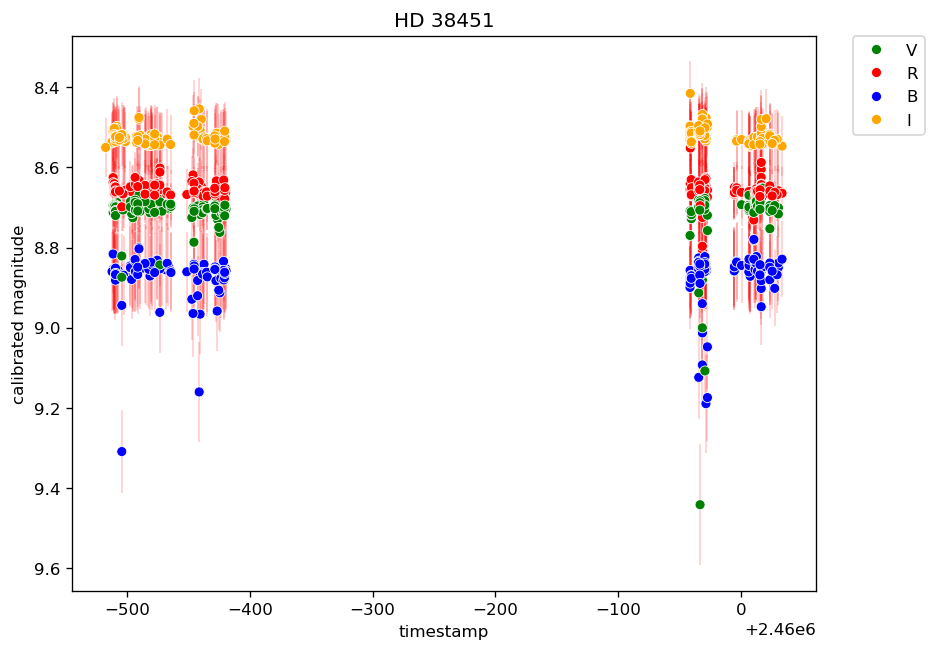

In [8]:
fig = pyplot.figure(figsize=(8, 6), dpi=120)
mag = seaborn.scatterplot(
    x=photometry['timestamp'],
    y=photometry['calibrated magnitude'],
    hue=photometry['band'],
    palette={
        'V': 'green',
        'B': 'blue',
        'R': 'red',
        'I': 'orange',
    }
)
pyplot.errorbar(
    photometry['timestamp'],
    photometry['calibrated magnitude'],
    yerr=photometry['calibrated magnitude err'],
    ecolor='red',
    ls='none',
    zorder=-1,
    alpha=0.2,
    elinewidth=1,
)
mag.invert_yaxis()
mag.set(title='HD 38451')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [56]:
lcs = lightkurve.search_lightcurve("HD 38451")
lcs

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,SPOC,120,29605594,0.0
1,TESS Sector 44,2021,SPOC,120,29605594,0.0
2,TESS Sector 45,2021,SPOC,120,29605594,0.0
3,TESS Sector 43,2021,TESS-SPOC,600,29605594,0.0
4,TESS Sector 44,2021,TESS-SPOC,600,29605594,0.0
5,TESS Sector 45,2021,TESS-SPOC,600,29605594,0.0
6,TESS Sector 43,2021,QLP,600,29605594,0.0
7,TESS Sector 44,2021,QLP,600,29605594,0.0
8,TESS Sector 45,2021,QLP,600,29605594,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

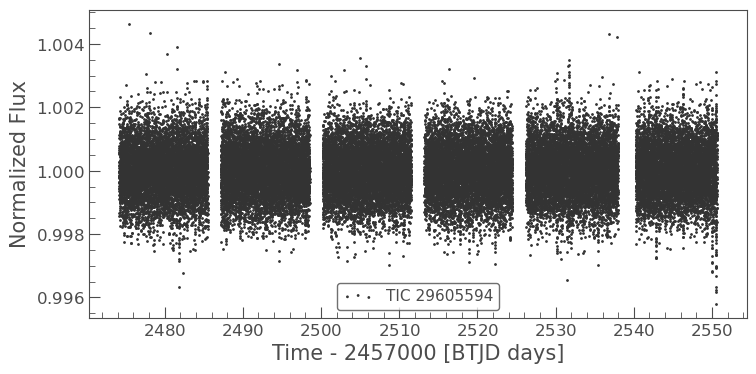

In [59]:
lc = lcs[0:3].download_all().stitch().remove_outliers().flatten()
lc.scatter()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

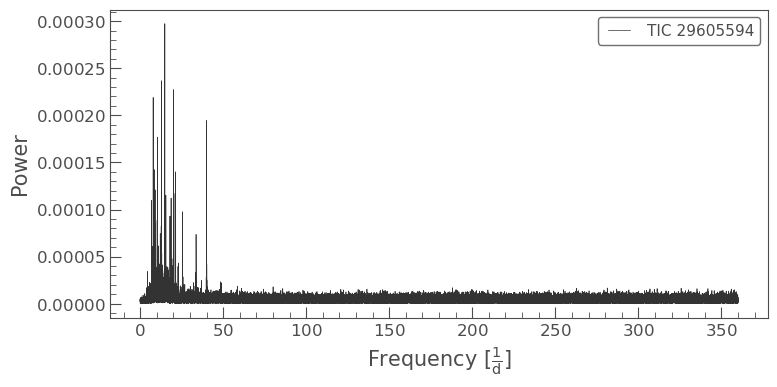

In [60]:
per = lc.to_periodogram()
per.plot()

In [61]:
period = per.period_at_max_power
period

<Quantity 0.0672895 d>

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

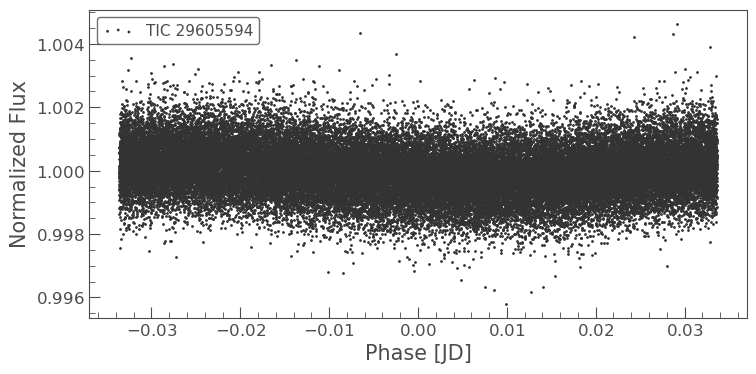

In [62]:
lc.fold(period).scatter()